In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('customer_analysis.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [3]:
# Find Missing Values

df.isna().sum()

# Income have 24 missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
# Fill "Income" values with mean of income column

mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [5]:
# Find Missing Values

df.isna().sum()

# No Missing Values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
# Convertion format of Dt_Customer column to date time format to %d-%m-%Y

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [7]:
# Label Encoding for Education & Marital_Status Column

df_new = df.copy()

label_encoder = LabelEncoder()

df_new['Education'] = label_encoder.fit_transform(df_new['Education'])

df_new['Marital_Status'] = label_encoder.fit_transform(df_new['Marital_Status'])

df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
# Feature Engineering (Create/Remove feature from available data):

# Age Extraction
current_year = datetime.now().year
df_new['Age'] = current_year - df_new['Year_Birth']

# Spending Power
df_new['Spent'] = df_new['MntWines'] + df_new['MntFruits'] + df_new['MntMeatProducts'] + df_new['MntFishProducts'] + df_new['MntSweetProducts'] + df_new['MntGoldProds']

# Household Living Arrangement
df_new['Living_With'] = df_new['Marital_Status']

# Family Dynamics
df_new['Children'] = df_new['Kidhome'] + df_new['Teenhome']

# Family Unity
df_new['Family_Size'] = 1 + df_new['Children']

# Parental Status
df_new['Is_Parent'] = df_new['Children'].apply(lambda x: 1 if x > 0 else 0)

# Educational Evolution
df_new['Education'] = df_new['Education'].replace({
    0: '2n Cycle',
    1: 'Basic',
    2: 'Graduation',
    3: 'Master',
    4: 'PhD'
})

# Farewell to Redundancy
df_new = df_new.drop(['Kidhome', 'Teenhome'], axis=1)

## Data Preparation

In [9]:
# Label encoding column Education
label_encoder = LabelEncoder()

df_new['Education'] = label_encoder.fit_transform(df_new['Education'])

df_new

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,2,4,58138.0,2012-09-04,58,635,88,546,...,0,3,11,1,66,1617,4,0,1,0
1,2174,1954,2,4,46344.0,2014-03-08,38,11,1,6,...,0,3,11,0,69,27,4,2,3,1
2,4141,1965,2,5,71613.0,2013-08-21,26,426,49,127,...,0,3,11,0,58,776,5,0,1,0
3,6182,1984,2,5,26646.0,2014-02-10,26,11,4,20,...,0,3,11,0,39,53,5,1,2,1
4,5324,1981,4,3,58293.0,2014-01-19,94,173,43,118,...,0,3,11,0,42,422,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,2013-06-13,46,709,43,182,...,0,3,11,0,56,1341,3,1,2,1
2236,4001,1946,4,5,64014.0,2014-06-10,56,406,0,30,...,0,3,11,0,77,444,5,3,4,1
2237,7270,1981,2,2,56981.0,2014-01-25,91,908,48,217,...,0,3,11,0,42,1241,2,0,1,0
2238,8235,1956,3,5,69245.0,2014-01-24,8,428,30,214,...,0,3,11,0,67,843,5,1,2,1


In [10]:
# Scaling
scaler = StandardScaler()

features_to_scale = ['Income', 'Spent', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_new[features_to_scale] = scaler.fit_transform(df_new[features_to_scale])

df_new

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,2,4,0.235327,2012-09-04,0.307039,0.983781,1.551577,1.679702,...,0,3,11,1,66,1.679417,4,0,1,0
1,2174,1954,2,4,-0.235826,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,...,0,3,11,0,69,-0.961275,4,2,3,1
2,4141,1965,2,5,0.773633,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,...,0,3,11,0,58,0.282673,5,0,1,0
3,6182,1984,2,5,-1.022732,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,...,0,3,11,0,39,-0.918094,5,1,2,1
4,5324,1981,4,3,0.241519,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,...,0,3,11,0,42,-0.305254,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,0.358568,2013-06-13,-0.107383,1.203678,0.419916,0.066692,...,0,3,11,0,56,1.221032,3,1,2,1
2236,4001,1946,4,5,0.470064,2014-06-10,0.237969,0.303291,-0.661449,-0.606873,...,0,3,11,0,77,-0.268717,5,3,4,1
2237,7270,1981,2,2,0.189106,2014-01-25,1.446700,1.795020,0.545656,0.221789,...,0,3,11,0,42,1.054951,2,0,1,0
2238,8235,1956,3,5,0.679035,2014-01-24,-1.419719,0.368666,0.092992,0.208495,...,0,3,11,0,67,0.393948,5,1,2,1


In [11]:
# Dimensionality Reduction

df_numeric = df_new.select_dtypes(include=[np.number])

n_components = 5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_numeric)

## Clustering

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

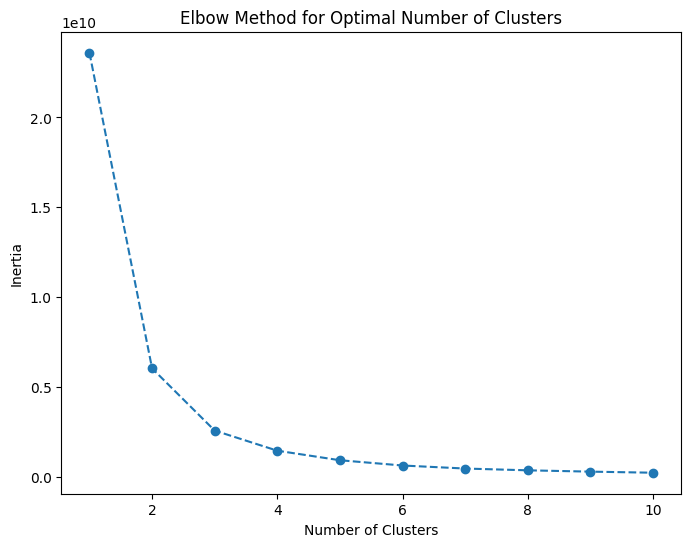

In [12]:
# Elbow Method
df_new = df_new.drop('Dt_Customer', axis=1)

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_new)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [13]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)

df_new['Cluster'] = agg_clustering.fit_predict(df_new)

df_new['Cluster'].value_counts()

Cluster
0    624
1    491
2    456
3    341
4    328
Name: count, dtype: int64

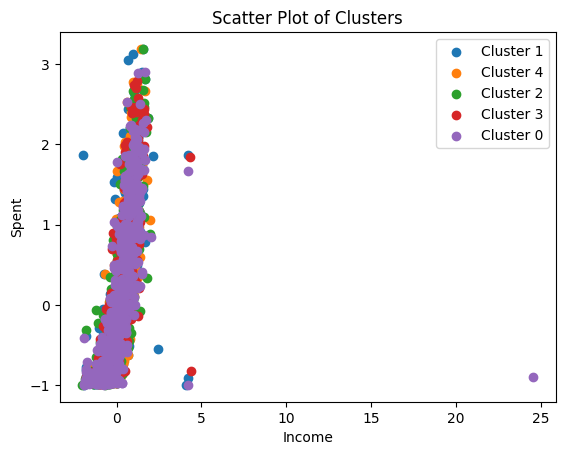

In [14]:
feature1 = 'Income'
feature2 = 'Spent'

cluster_col = 'Cluster'

for cluster in df_new[cluster_col].unique():
    cluster_data = df_new[df_new[cluster_col] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.title('Scatter Plot of Clusters')
plt.show()

## Visualizastion

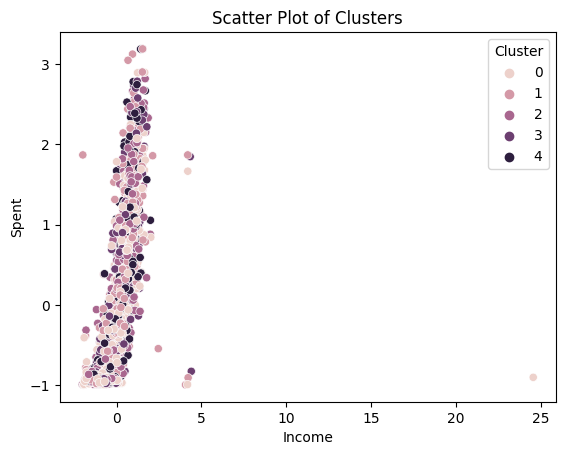

In [16]:
feature1 = 'Income'
feature2 = 'Spent'

cluster_col = 'Cluster'

sns.scatterplot(x=feature1, y=feature2, data=df_new, hue=cluster_col)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Clusters')
plt.show()

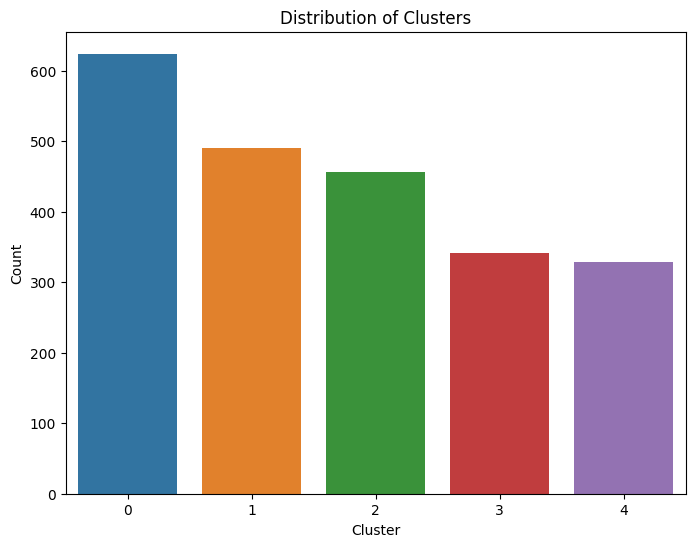

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_col, data=df_new)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()

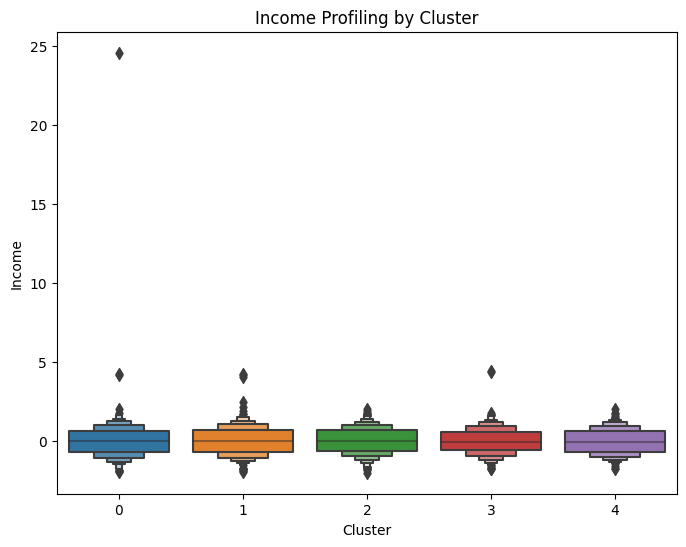

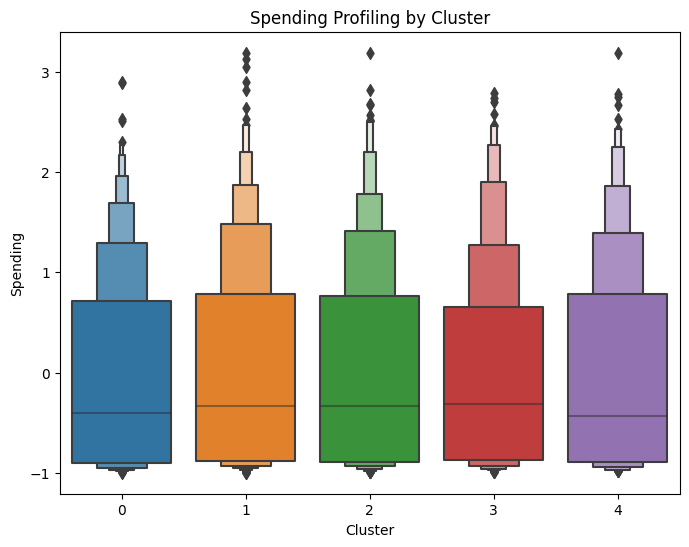

In [18]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x=cluster_col, y='Income', data=df_new)
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Income Profiling by Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxenplot(x=cluster_col, y='Spent', data=df_new)
plt.xlabel('Cluster')
plt.ylabel('Spending')
plt.title('Spending Profiling by Cluster')
plt.show()